In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [4]:
df=pd.read_csv('kidney_disease.csv')

In [10]:
[feature for feature in df.columns if df[feature].isnull().sum()>0]

['age',
 'bp',
 'sg',
 'al',
 'su',
 'rbc',
 'pc',
 'pcc',
 'ba',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane']

In [13]:
#Age,BP has numeric and remaining as categorical

from sklearn.impute import SimpleImputer
median = SimpleImputer(missing_values=np.nan, strategy='median')
df_imp_mean=pd.DataFrame(median.fit_transform(df[['age','bp']]),columns=('age','bp'))
df_imp_mean

,age,bp
0,48.0,80.0
1,7.0,50.0
2,62.0,80.0
3,48.0,70.0
4,51.0,80.0
...,...,...
395,55.0,80.0
396,42.0,70.0
397,12.0,80.0
398,17.0,60.0


In [16]:
df_exclude=['age','bp']
df_include=[col for col in df.columns if col not in df_exclude]
mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

df_imp_mode=pd.DataFrame(mode.fit_transform(df[df_include]))
df_imp_mode.columns=df[df_include].columns
df_imp_mode

,id,sg,al,su,rbc,pc,pcc,ba,bgr,bu,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,1.02,1.0,0.0,normal,normal,notpresent,notpresent,121.0,36.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,1.02,4.0,0.0,normal,normal,notpresent,notpresent,99.0,18.0,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,2,1.01,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,1.01,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,1.02,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,1.02,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [22]:
final_df=pd.concat([df_imp_mean,df_imp_mode],axis=1)

In [24]:
final_df.drop('id',inplace=True,axis=1)

In [25]:
final_df.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [28]:
#to check unique values
set(final_df['age'].unique().tolist())

{2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 11.0,
 12.0,
 14.0,
 15.0,
 17.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 90.0}

In [30]:
for i in final_df.columns:
    print(f'**********{i}**********')
    print()
    print(set(final_df[i].unique().tolist()))
    print()

**********age**********

{2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 11.0, 12.0, 14.0, 15.0, 17.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 90.0}

**********bp**********

{100.0, 70.0, 140.0, 110.0, 80.0, 50.0, 180.0, 120.0, 90.0, 60.0}

**********sg**********

{1.02, 1.025, 1.005, 1.015, 1.01}

**********al**********

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0}

**********su**********

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0}

**********rbc**********

{'abnormal', 'normal'}

**********pc**********

{'abnormal', 'normal'}

**********pcc**********

{'present', 'notpresent'}

**********ba**********

{'present', 'notpresent'}

**********bgr**********

{22.0, 70.0, 74.0, 75.0, 76.0, 78.0, 

In [33]:
final_df['classification']=final_df['classification'].replace({'ckd\t':'ckd'})

In [34]:
final_df['cad']=final_df['cad'].replace({'\tno':'no'})

In [35]:
final_df['dm']=final_df['dm'].replace({'\tyes':'yes','\tno':'no'})

In [36]:
final_df['rc'].mode()[0]

'5.2'

In [37]:
final_df['rc']=final_df['rc'].replace({'\t?':'5.2'})

In [38]:
final_df['wc'].mode()[0]

'9800'

In [42]:
final_df['wc']=final_df['wc'].apply(lambda x:'9800' if x in ('\t?','\t8400','\t6200') else x)

In [43]:
final_df['pcv'].mode()[0]

'41'

In [44]:
final_df['pcv']=final_df['pcv'].apply(lambda x:'41' if x in ('\t?','\t43') else x)

In [48]:
for i in final_df.columns:
    print(f'**********{i}**********')
    print()
    print(set(final_df[i].unique().tolist()))
    print()

**********age**********

{2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 11.0, 12.0, 14.0, 15.0, 17.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 90.0}

**********bp**********

{100.0, 70.0, 140.0, 110.0, 80.0, 50.0, 180.0, 120.0, 90.0, 60.0}

**********sg**********

{1.02, 1.025, 1.005, 1.015, 1.01}

**********al**********

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0}

**********su**********

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0}

**********rbc**********

{'abnormal', 'normal'}

**********pc**********

{'abnormal', 'normal'}

**********pcc**********

{'present', 'notpresent'}

**********ba**********

{'present', 'notpresent'}

**********bgr**********

{22.0, 70.0, 74.0, 75.0, 76.0, 78.0, 

In [47]:
final_df['dm']=final_df['dm'].apply(lambda x:x.replace(' yes','yes'))

In [49]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [50]:
final_df.dtypes

age               float64
bp                float64
sg                 object
al                 object
su                 object
rbc                object
pc                 object
pcc                object
ba                 object
bgr                object
bu                 object
sc                 object
sod                object
pot                object
hemo               object
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [53]:
df.select_dtypes(exclude=('object')).columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot',
       'hemo'],
      dtype='object')

In [55]:

columns_to_exclude = ['id']

# Select numeric columns (excluding 'id')
numeric_columns = df.select_dtypes(exclude='object').columns.difference(columns_to_exclude)
for i in numeric_columns:
    final_df[i]=final_df[i].apply(lambda x:float(x))

In [60]:
#to chekc target variable
final_df['classification'].value_counts().values

array([250, 150])

In [61]:
final_df['classification'].value_counts().index

Index(['ckd', 'notckd'], dtype='object', name='classification')

In [62]:
temp_target_df=pd.DataFrame(data=final_df,index=final_df['classification'].value_counts().index,columns=final_df['classification'].value_counts().values)

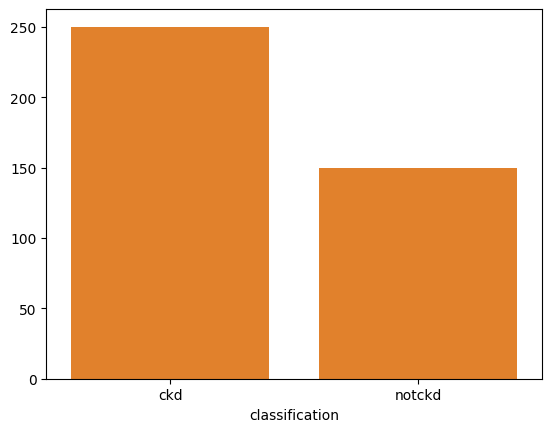

In [64]:
sns.barplot(data=temp_target_df,x=final_df['classification'].value_counts().index,y=final_df['classification'].value_counts().values)
plt.show()

In [75]:
#to chek each independent distribution
def distplot(col):
    sns.displot(final_df[col])
    plt.show()

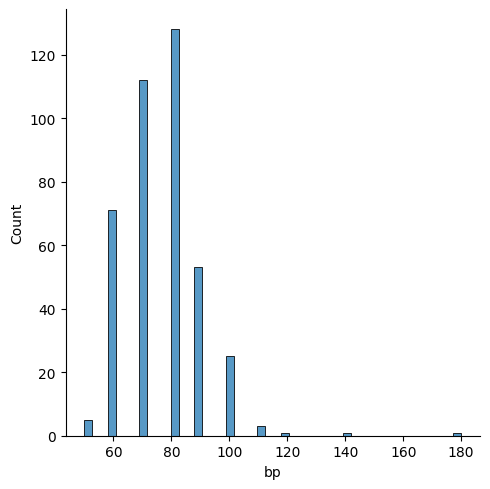

bp


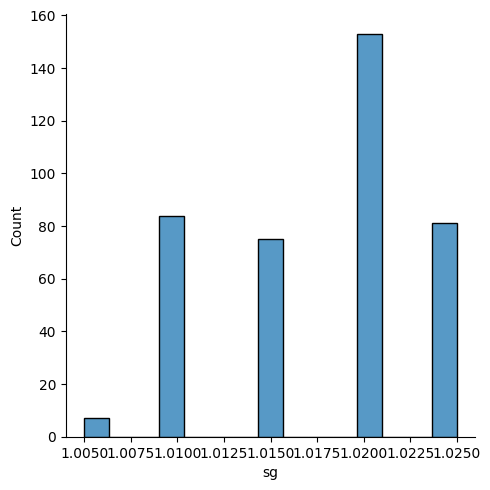

sg


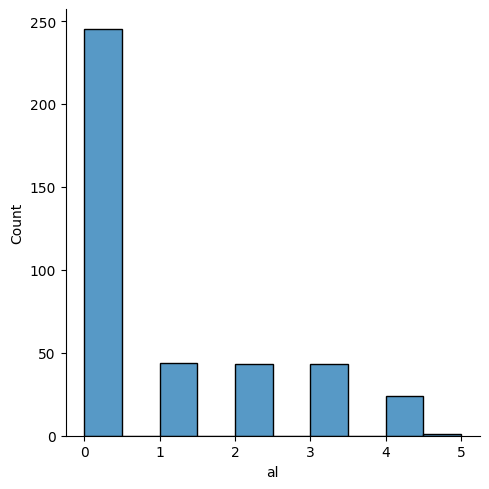

al


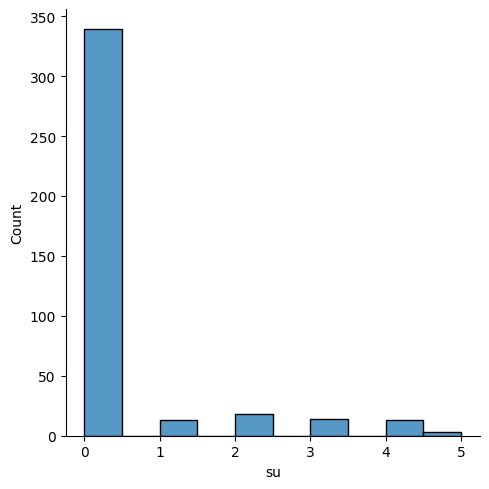

su


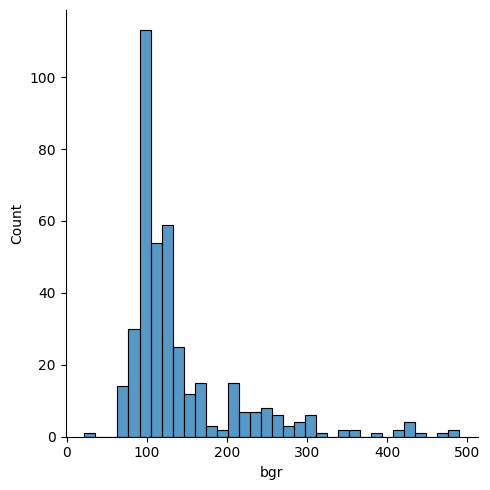

bgr


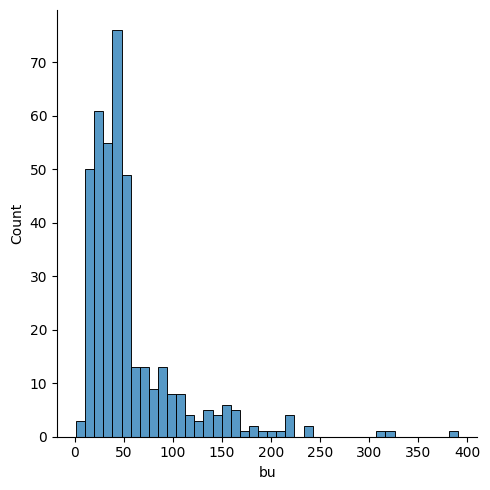

bu


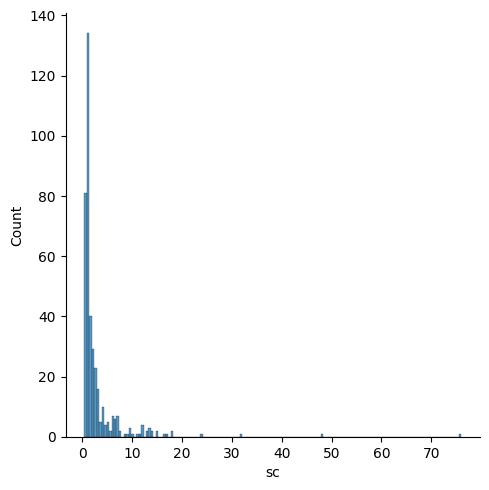

sc


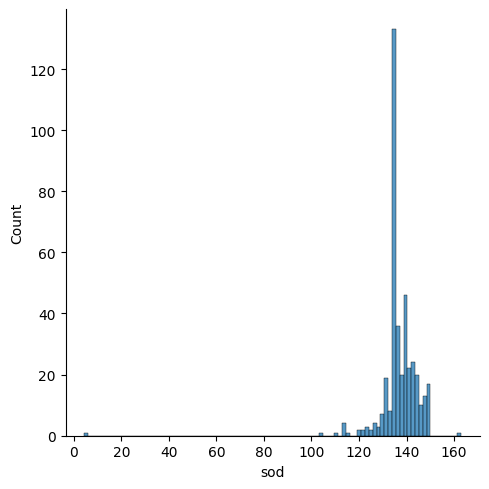

sod


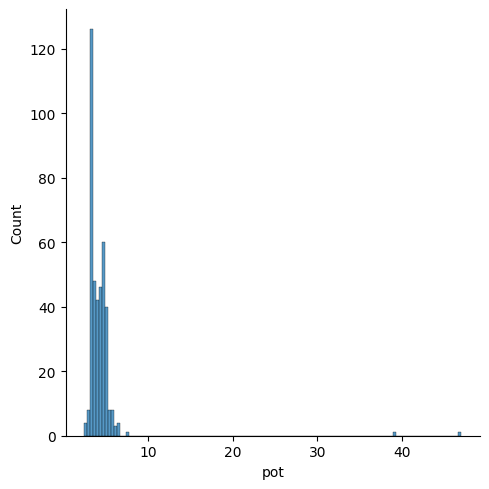

pot


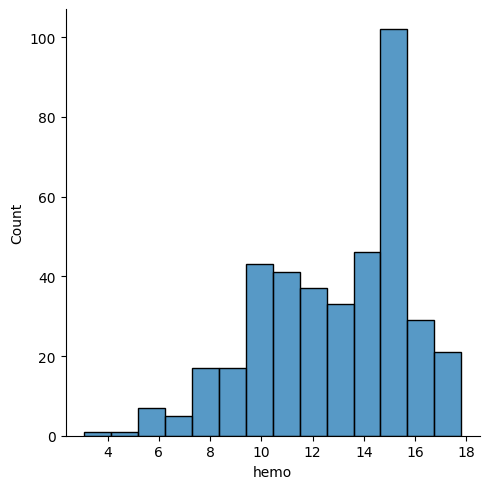

hemo


In [80]:
    
for i in list(final_df.select_dtypes(exclude = ['object']).columns)[1:]:
    distplot(i)
    print(i)

In [81]:
def boxplot(col):
    sns.boxplot(final_df[col])
    plt.show()

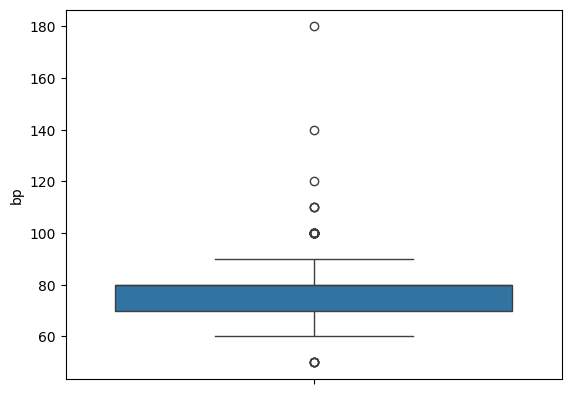

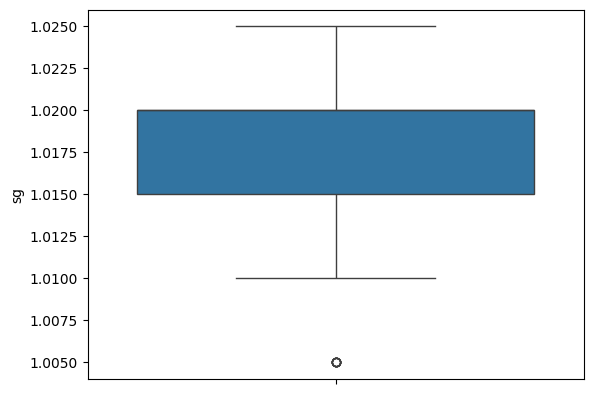

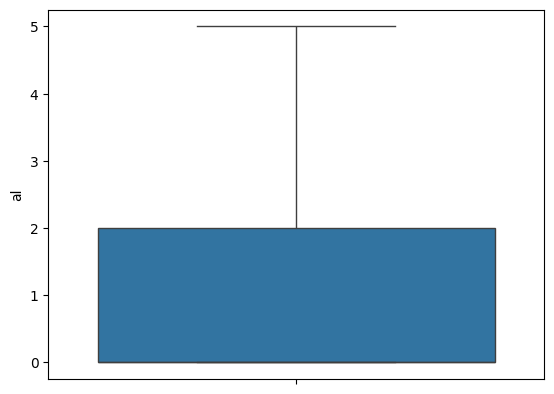

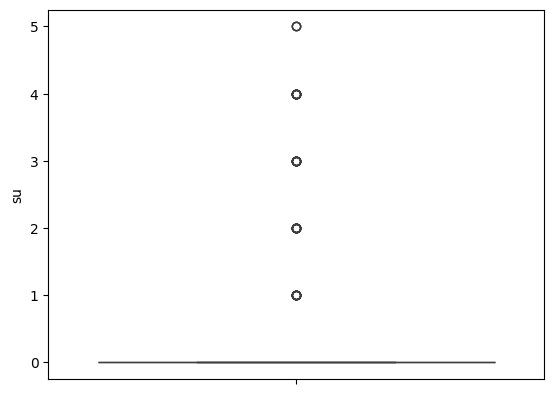

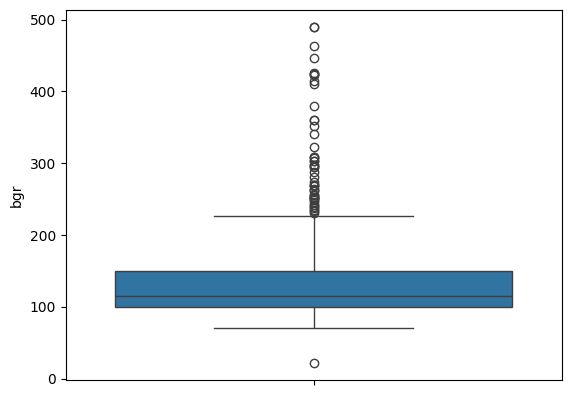

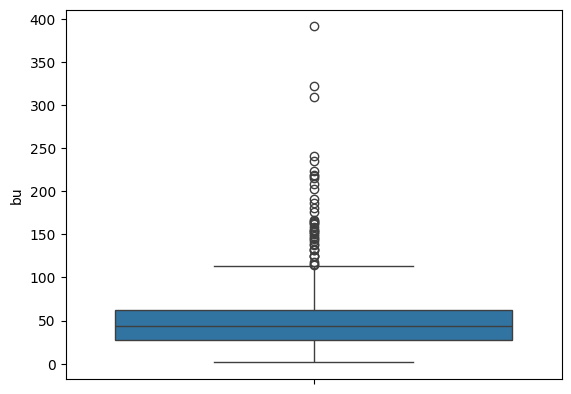

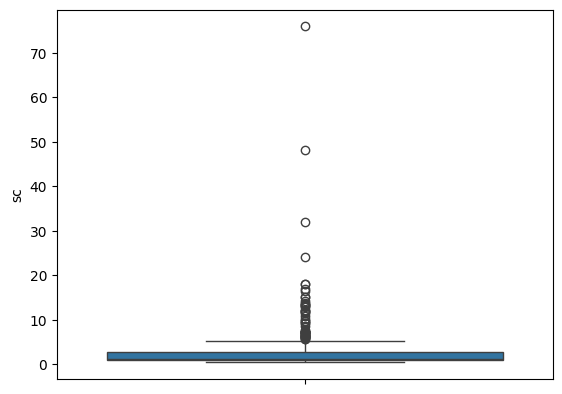

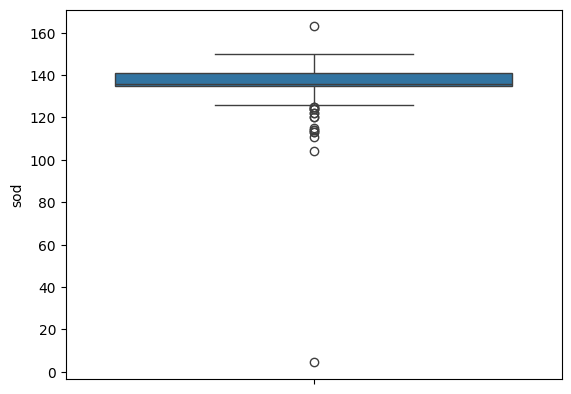

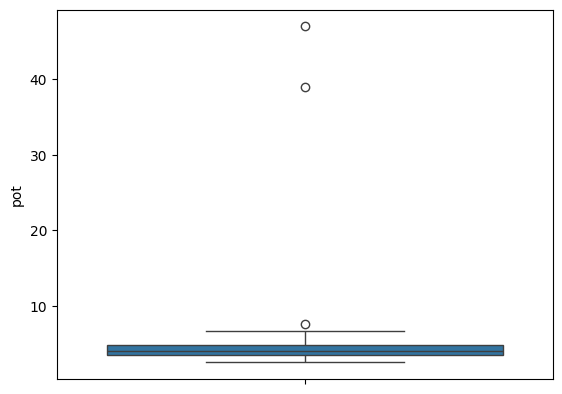

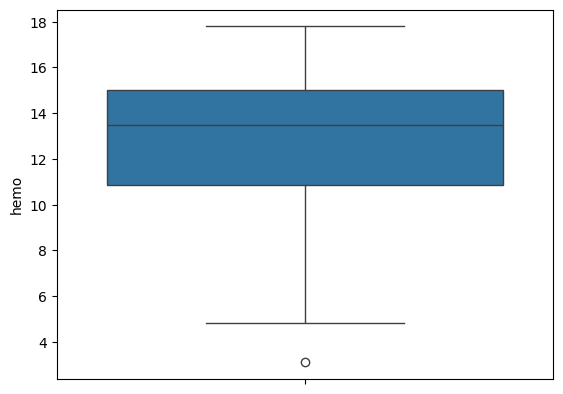

In [82]:
    
for i in list(final_df.select_dtypes(exclude = ['object']).columns)[1:]:
    boxplot(i)


In [84]:
final_df.head(2)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.02,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.02,4.0,0.0,normal,normal,notpresent,notpresent,99.0,...,38,6000,5.2,no,no,no,good,no,no,ckd


In [86]:
#convert category to numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
finalised_df=final_df.apply(le.fit_transform)
#encode = df_imputer.apply(preprocessing.LabelEncoder().fit_transform)
finalised_df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,40,3,3,1,0,1,1,0,0,48,...,30,69,33,1,1,0,0,0,0,0
1,5,0,3,4,0,1,1,0,0,26,...,24,53,33,0,0,0,0,0,0,0
2,54,3,1,2,3,1,1,0,0,140,...,17,67,33,0,1,0,1,0,1,0
3,40,2,0,4,0,1,0,1,0,44,...,18,59,18,1,0,0,1,1,1,0
4,43,3,1,2,0,1,1,0,0,33,...,21,65,26,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,47,3,3,0,0,1,1,0,0,64,...,33,59,29,0,0,0,0,0,0,1
396,34,2,4,0,0,1,1,0,0,3,...,40,69,43,0,0,0,0,0,0,1
397,8,3,3,0,0,1,1,0,0,27,...,35,58,35,0,0,0,0,0,0,1
398,11,1,4,0,0,1,1,0,0,41,...,37,64,40,0,0,0,0,0,0,1


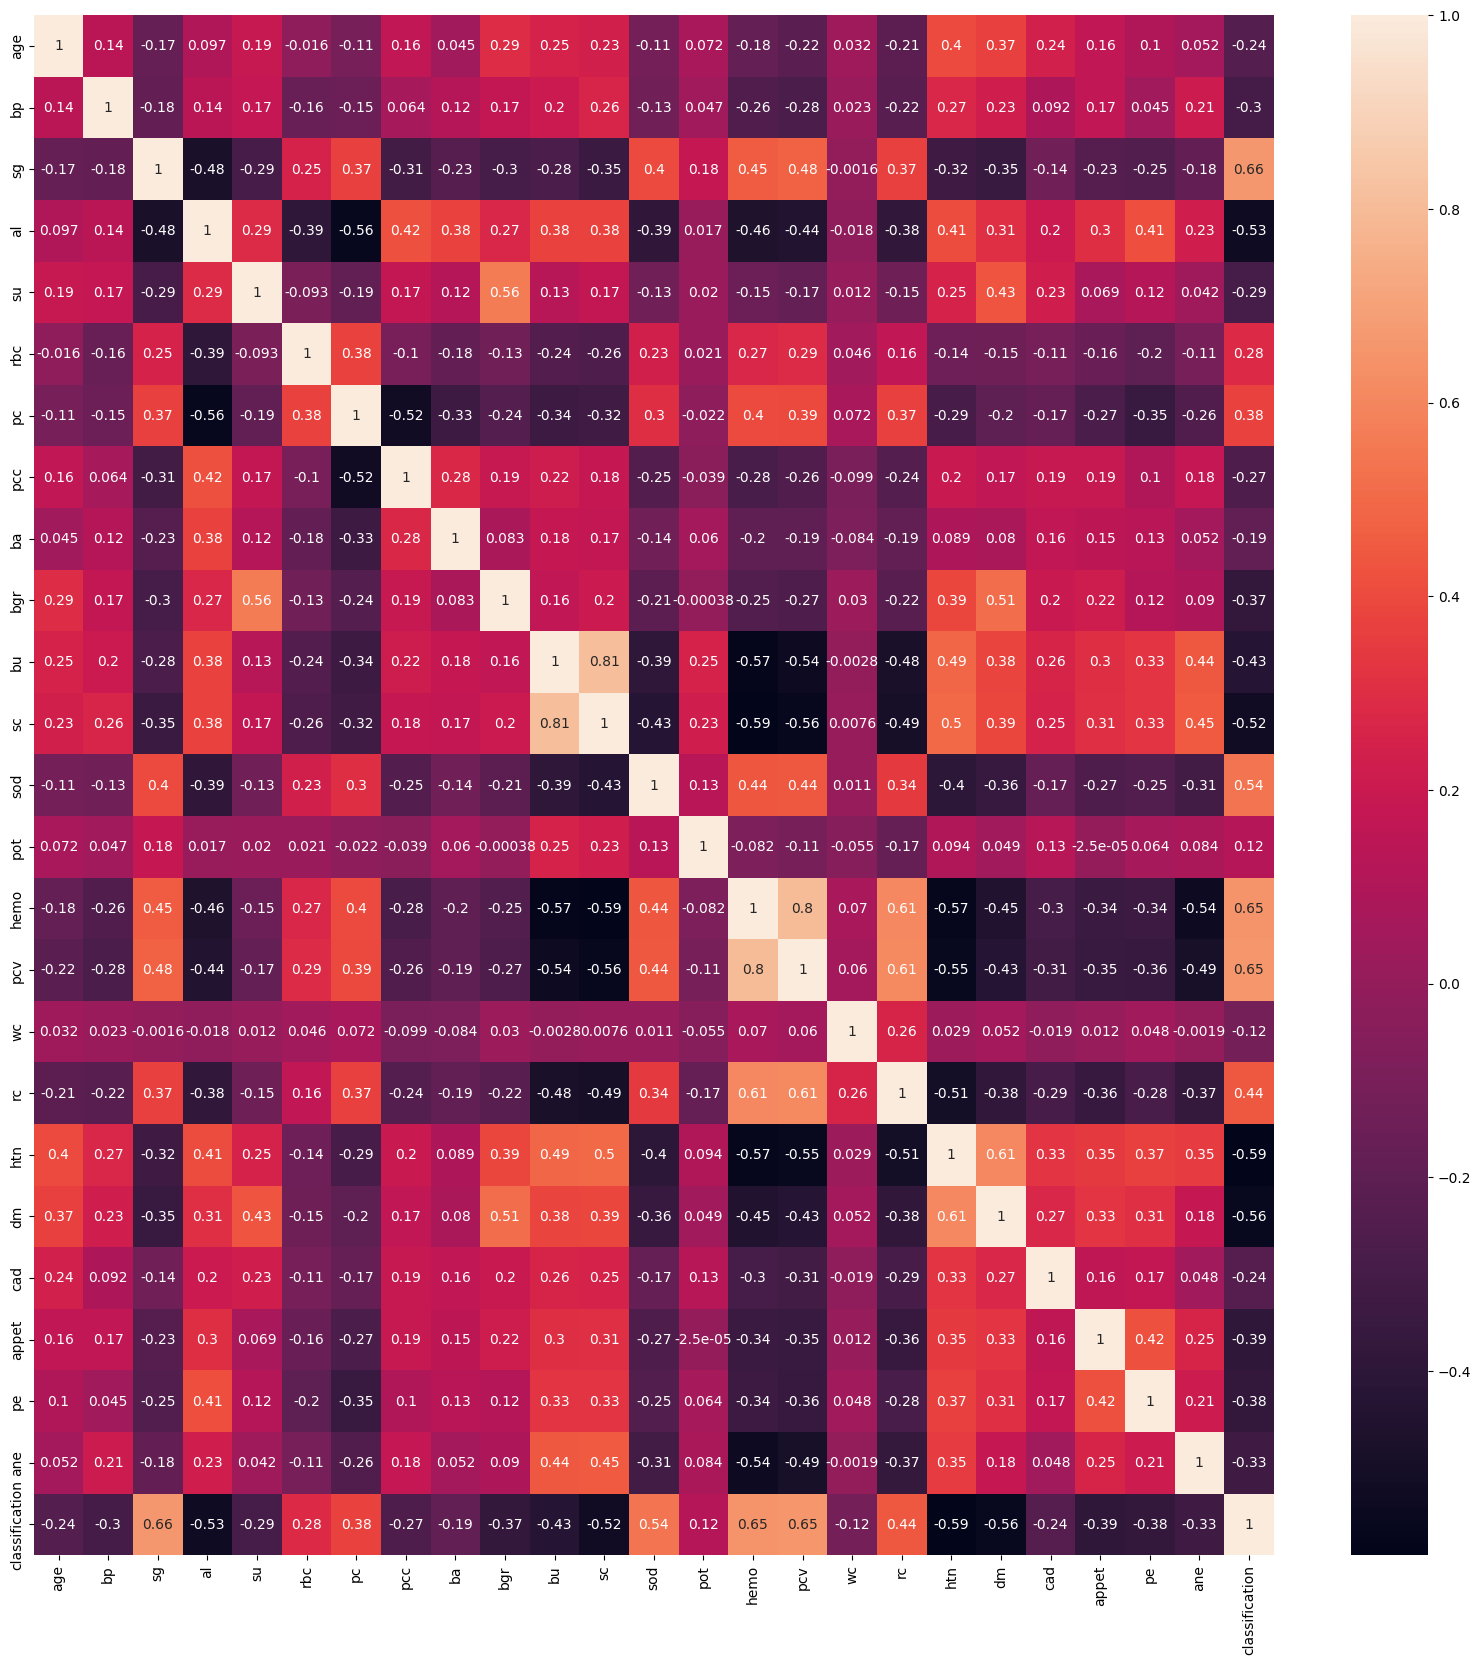

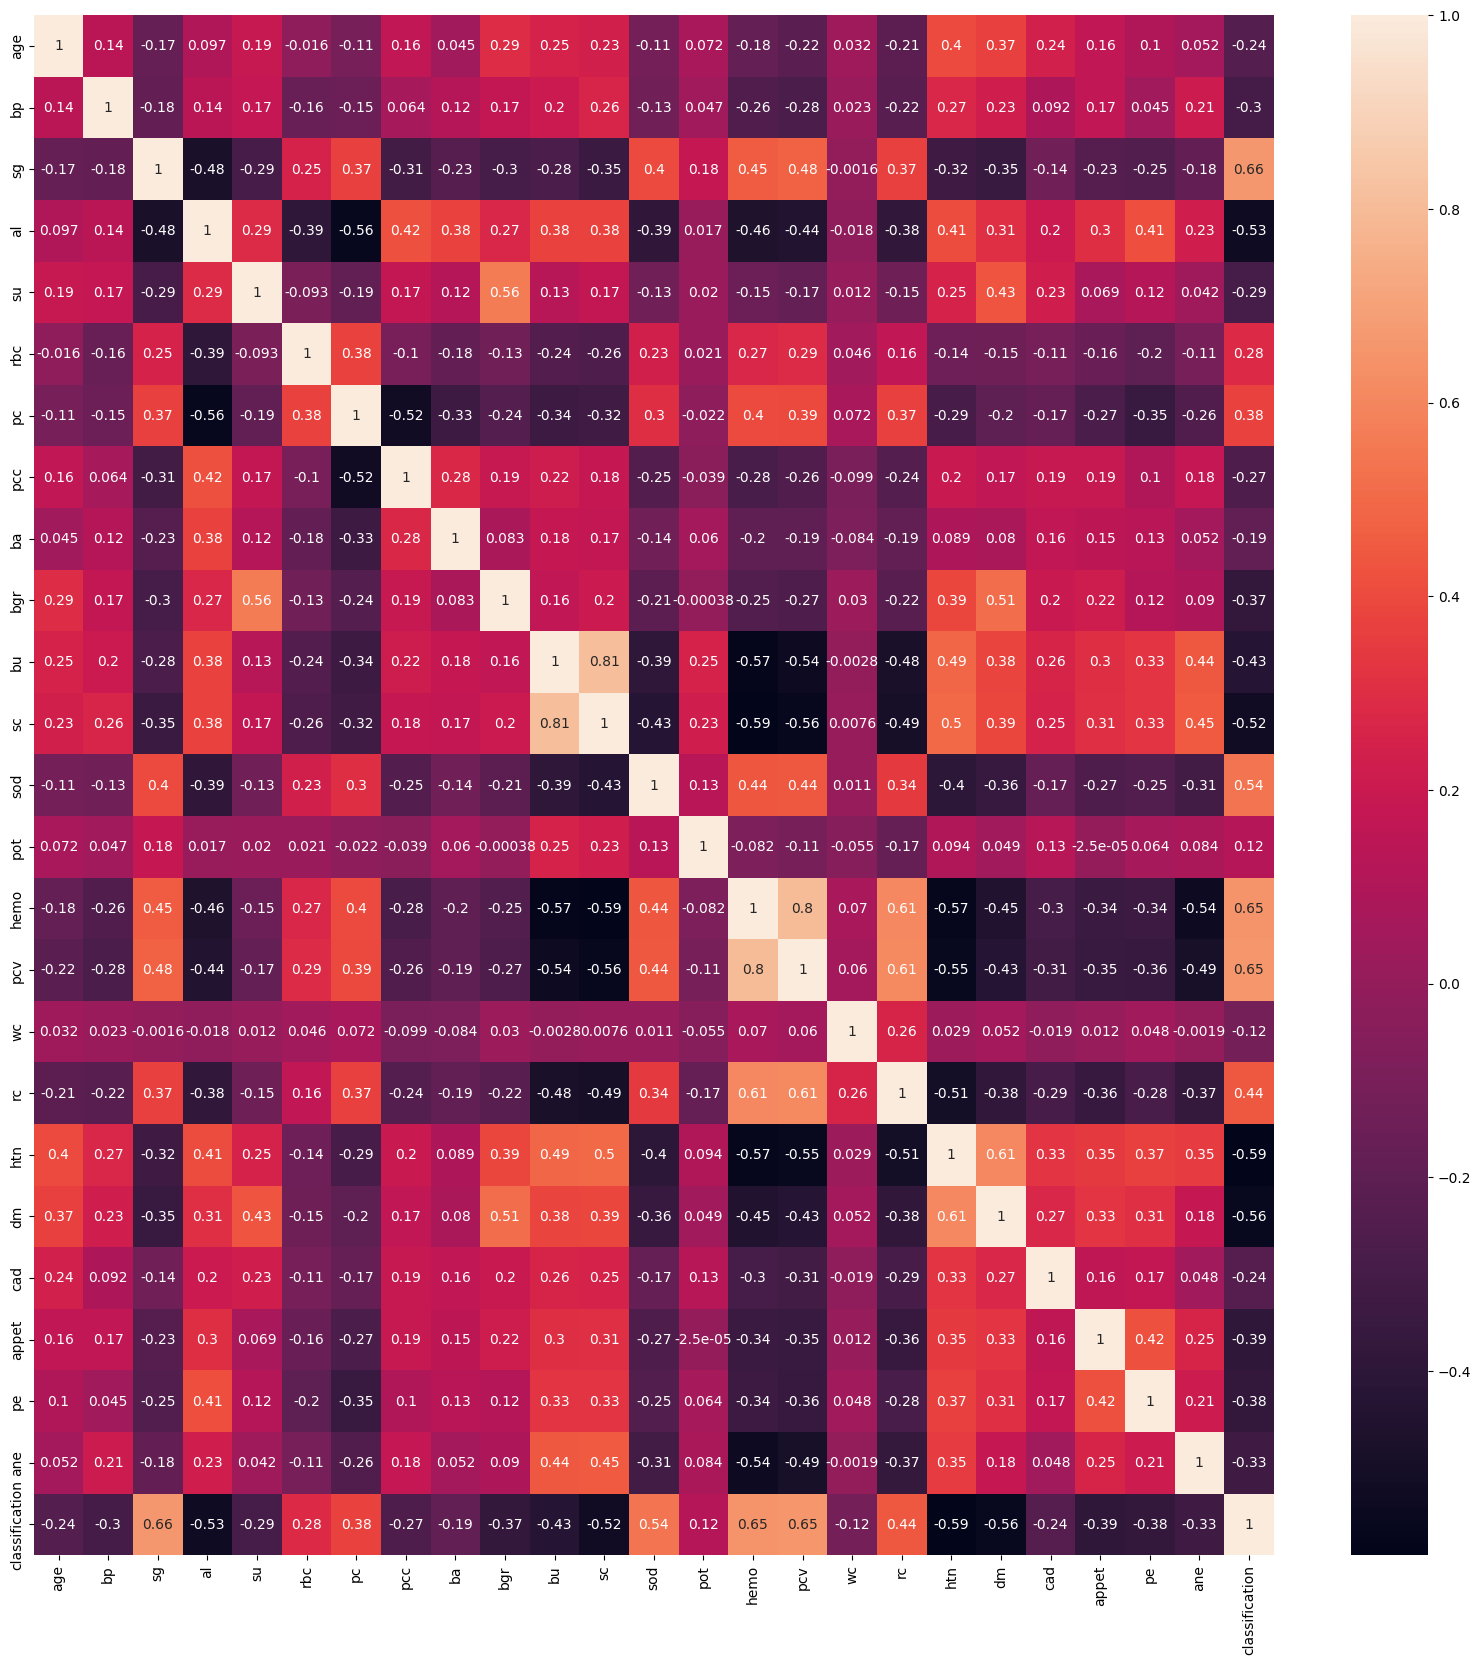

In [88]:
plt.figure(figsize=(20,20))
corr = finalised_df.corr()
sns.heatmap(corr, annot = True)
plt.show()

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [91]:
independent=finalised_df.drop('classification',axis=1)

In [92]:
independent

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,40,3,3,1,0,1,1,0,0,48,...,90,30,69,33,1,1,0,0,0,0
1,5,0,3,4,0,1,1,0,0,26,...,49,24,53,33,0,0,0,0,0,0
2,54,3,1,2,3,1,1,0,0,140,...,32,17,67,33,0,1,0,1,0,1
3,40,2,0,4,0,1,0,1,0,44,...,48,18,59,18,1,0,0,1,1,1
4,43,3,1,2,0,1,1,0,0,33,...,52,21,65,26,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,47,3,3,0,0,1,1,0,0,64,...,93,33,59,29,0,0,0,0,0,0
396,34,2,4,0,0,1,1,0,0,3,...,101,40,69,43,0,0,0,0,0,0
397,8,3,3,0,0,1,1,0,0,27,...,94,35,58,35,0,0,0,0,0,0
398,11,1,4,0,0,1,1,0,0,41,...,78,37,64,40,0,0,0,0,0,0


In [93]:
dependent=finalised_df['classification']

In [96]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [95]:
!pip install imblearn

   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/258.3 kB 1.3 MB/s eta 0:00:01
   ---------------------- ----------------- 143.4/258.3 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 258.3/258.3 kB 2.0 MB/s eta 0:00:00


In [98]:
Counter(dependent)

Counter({0: 250, 1: 150})

In [102]:
ros=RandomOverSampler()
x_ros,y_ros=ros.fit_resample(independent,dependent)
Counter(y_ros)

Counter({0: 250, 1: 250})